In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from datetime import datetime

In [22]:
weather=pd.read_csv('austin_weather.csv')
traffic=pd.read_csv('Traffic_Count_Study_Area.csv')
trips=pd.read_csv('austin_bikeshare_trips.csv')
weather.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [27]:
weather.Events.unique()
weather['Rain']=np.where(weather.Events.str.contains('Rain'), 1, 0)
weather['Fog']=np.where(weather.Events.str.contains('Fog'), 1, 0)
weather['Thunderstorm']=np.where(weather.Events.str.contains('Thunderstorm'), 1, 0)
weather['Snow']=np.where(weather.Events.str.contains('Snow'), 1, 0)
weather['None']=np.where(weather.Events.isnull, 1, 0)
weather.Date=pd.to_datetime(weather.Date)
weather=weather.set_index('Date')

None            1319
Rain             377
Fog               69
Snow               1
Thunderstorm     188
dtype: int64

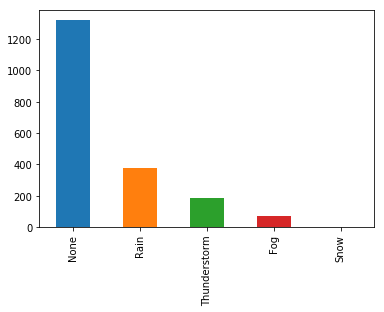

In [28]:
weather.groupby(['Rain','Fog','Snow'],as_index=False).agg('sum')
events=weather[['None','Rain','Fog','Snow','Thunderstorm']].sum(axis=0)
events.sort_values(ascending=False).plot(kind='bar')
events

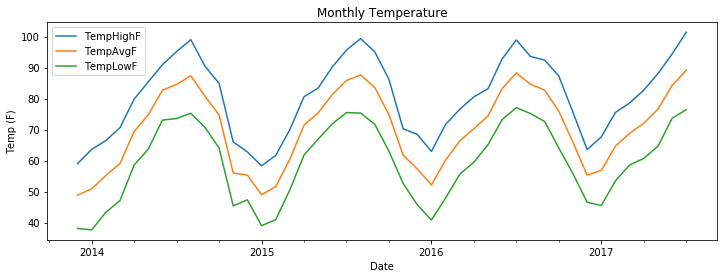

In [70]:
weather[['TempHighF', 'TempAvgF', 'TempLowF']].resample('M').mean().plot(title='Monthly Temperature', figsize=(12,4))
plt.ylabel('Temp (F)')
plt.show()

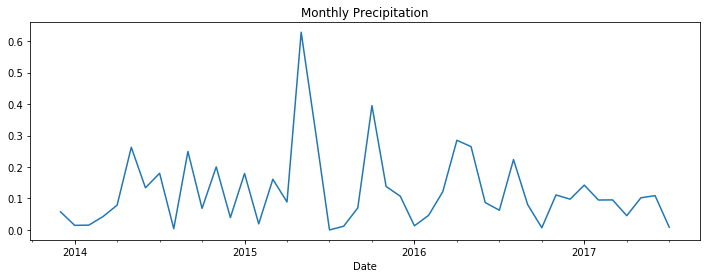

In [69]:
weather['PrecipitationSumInches']=pd.to_numeric(weather['PrecipitationSumInches'],errors='coerce')
weather['PrecipitationSumInches'].resample('M').mean().plot(title='Monthly Precipitation', figsize=(12, 4))
plt.show()
# May: high precipitation; June: lower

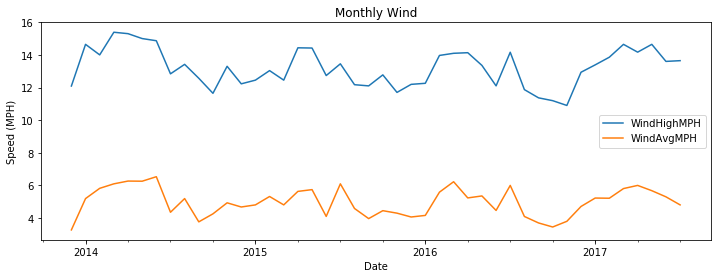

In [73]:
weather['WindHighMPH']=pd.to_numeric(weather['WindHighMPH'],errors='coerce')
weather['WindAvgMPH']=pd.to_numeric(weather['WindAvgMPH'],errors='coerce')
weather[['WindHighMPH','WindAvgMPH']].resample('M').mean().plot(title='Monthly Wind', figsize=(12,4))
plt.ylabel('Speed (MPH)')
plt.show()

In [ ]:
# precipitation vs. bike use
# temperature vx. bike use

In [4]:
traffic.DATE=pd.to_datetime(traffic.DATE)
traffic.head()

,24 HOUR VOLUME COUNT LOCATIONS,NB TOTAL,SB TOTAL,EB TOTAL,WB TOTOAL,TOTAL VOLUME,DATE
0,"10th St East, 1000 blk - West of Waller St",NaN,NaN,101.0,115.0,216,2005-09-27
1,"10th St East, 1200 blk - West of Navasota St",NaN,NaN,103.0,55.0,158,2005-09-27
2,"10th St East, 600 blk - East of Red River St",NaN,NaN,NaN,2240.0,2240,2009-02-26
3,"10th St East, 700 blk - West of IH35 WSR ...",NaN,NaN,NaN,1599.0,1599,2005-07-06
4,"10th St West, 1000 blk - West of N. Lamar Blvd",NaN,NaN,373.0,288.0,661,2001-01-24


In [12]:
trips.head()

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year,date,hour
0,8.0,19:12:00,41,2565.0,Trinity & 6th Street,3.0,2536.0,Waller & 6th St.,2015/3/19 19:12,Walk Up,9900082882,2015.0,2015-03-19,19
1,141.0,2:06:04,6,2570.0,South Congress & Academy,10.0,2494.0,2nd & Congress,2016/10/30 2:06,Local365,12617682,2016.0,2016-10-30,2
2,578.0,16:28:27,13,2498.0,Convention Center / 4th St. @ MetroRail,3.0,2538.0,Bullock Museum @ Congress & MLK,2016/3/11 16:28,Local365,9075366,2016.0,2016-03-11,16
3,555.0,15:12:00,80,2712.0,Toomey Rd @ South Lamar,11.0,2497.0,Capitol Station / Congress & 11th,2014/11/23 15:12,24-Hour Kiosk (Austin B-cycle),9900319298,2014.0,2014-11-23,15
4,86.0,15:39:13,25,3377.0,MoPac Pedestrian Bridge @ Veterans Drive,4.0,2707.0,Rainey St @ Cummings,2017/4/16 15:39,Walk Up,14468597,2017.0,2017-04-16,15


In [14]:
ind = pd.DatetimeIndex(trips.start_time)
trips['date'] = ind.date.astype('datetime64')
trips['hour'] = ind.hour
by_date = trips.pivot_table('trip_id', aggfunc='count',index='date',columns='subscriber_type', )
by_date = trips.groupby(['date', 'subscriber_type'])['trip_id'].count()
by_date.name = 'count'
by_date = by_date.reset_index('subscriber_type')


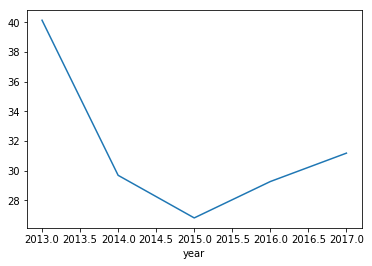

In [19]:
trips.groupby(['year'])['duration_minutes'].mean().plot()